# Section 2. Intro to NumPy
## 2.1 Getting Started with NumPy

NumPy (often pronounced "Num-pie") is a widely used module that is optimized to efficiently execute a variety of mathematical operations. The name Numpy hints at its usefulness for us: Numerical Python. Numpy will be extremely useful for your budding career as an astronomer because of everything it can help you do - read in and manipulate large amounts of data, quickly do simple or complex math, and much much more.

Before we do anything else, we must import the module. Try doing this yourself in the cell below.
```
import numpy as np
```
The alias np isn't necessary, strictly speaking, but it will make your life easier by taking up less space on a line of code. It is standard practice to import numpy as np like this, so it's best to get into the habit now.

In [ ]:
# import numpy below
import numpy as np

### 2.1.1 Making your first arrays

Now that we've imported the module, we can now start talking about why we want to use NumPy. 

The biggest and main advantage of using NumPy is the new data container it introduces: arrays. An array is like a list, except optimized for use in mathematical applications.

We can turn a list into an array as follows:
```
list1 = [0, 3, 8, 10, 14]
list2 = [9, 5, 3, 2, 4]

array1 = np.array([0, 3, 8, 10, 14])
array2 = np.array([9, 5, 3, 2, 4])
```
Above, I defined two lists, list1 and list2. Below, I created two arrays, array1 and array2, using the same numerical values as the lists. I could have also done the following instead:
```
array1 = np.array(list1)
```
Note that arrays in NumPy have a couple restrictions on what can go in them. The most important is that arrays should only contain numbers. There are exceptions, but for our purposes, they're not something to get into.

In the code block below, define the lists and arrays just like in the example above. You can change the values of the numbers if you want.

In [ ]:
list1 = [0, 3, 8, 10, 14]
list2 = [9, 5, 3, 2, 4]

array1 = np.array([0, 3, 8, 10, 14])
array2 = np.array([9, 5, 3, 2, 4])

### 2.1.2 Mathematical Manipulation of Arrays
To illustrate the difference, let's go back to lists. In the previous module, you were asked to do mathematical operations on two lists. If you wanted to add the entries of two lists together, your code would probably look something like this:
```
list3 = len(list1)*[0] # first line

for i in range(len(list1)): # second line
    list3[i] = list1[i] + list2[i] # third line
```
By my count, this is three lines of code, not including where we initialize the lists. Now, here's how you do the same thing with numpy:
```
array3 = array1 + array2
```
And that's it! Only one line of code! We won't show it here, but it's also much, much faster to do this type of operation with arrays instead of lists, especially as the number of entries in your array grows larger and larger.  [(Apparently numpy starts being faster around n=8)](https://stackoverflow.com/a/18713494)

What else can we do? Basically, anything you can do to two numbers in python, you can do to two lists in numpy. 
```
array1 + array2 # addition
array1 * array2 # multiplication
array1 - array2 # subtraction
array1 / array2 # division
array1**array2 # exponentiation
```
The catch is that if you're doing elementwise operations like this, both arrays must be the same length**. But, sometimes we just want to do something to all the numbers in one array. In this case, we can do operations with an array and a number (int or float). For example,
```
array1 + 2 # add 2 to all numbers
array1 / 2 # divide all numbers by 2
```
In all these cases, the rules for the order of operations are the same as for normal mathematical operations in regular Python.

### Problem: 3D Function

Mathematical functions commonly depend on two or more variables. Let's say we have a function $z=f(x,y)$ which we want to evaluate at different $(x,y)$ locations. Let's say we have 4 different points at which we want to evalate our function:
*   (0,0)
*   (1,2)
*   (2,5)
*   (3,9)

and we have a function of the form

$$ z = f(x,y) = \frac{xy^2}{3} + 2 $$

In the cell below, evaluate the function at those four points. You'll need to define two arrays, for both $x$ and $y$, and make sure your order of operations are correct. Before or after you do it, evaluate the function by hand at each point (either with a calculator or with pencil and paper) to make sure everything is correct.



In [ ]:
xs = np.array([0,1,2,3])
ys = np.array([0,2,5,9])

zs = xs*ys*ys/3 + 2
print(zs)

[ 2.          3.33333333 18.66666667 83.        ]


### 2.1.3 Special NumPy Functions

There are a lot of special mathematical functions that you'll probably use a lot throughout your work. We can divide these into different categories.

First, there are functions that exist in Python already, like $\sin(x)$, $\log(x)$, or $\exp(x)$. However, the native Python functions only work on single numbers (i.e. floats or ints), so we need a version that works for multidimensional objects. Here are some examples:
```
np.sin(x) # sin of each element in x
np.log10(x) # log base 10 of each element in x
np.exp(x) # e^x for each element in x
```

Then, there are some functions that only have meaning when we're dealing with collections of numbers. Some of these should be familiar from statistics, like the average, median, or range. Others include things like the product or sum of all elements, the difference between successive elements, or the maximum and minimum values of an array (and their indices). Here are some examples:
```
np.mean(x) # mean of x
np.stdev(x) # standard deviation of x
np.sum(x) # sum of array elements or along an axis
np.diff(x) # difference between consecutive elements along an axis
np.amin(x) # min value of array or along a given axis
np.argmax(x) # indices of max values of array or along a given axis
```

One nice thing about using these functions is that they typically take "array like" arguments. In other words, you can give these functions a list and they'll convert the list to an array for you! These are also much faster than their vanilla Python analogs since they're optimized for arrays.

You can find details and additional functions that could be useful to you [here](https://numpy.org/doc/stable/reference/routines.math.html) and [here](https://).

You may have noticed that in some of the comments I used the phrase "along an axis." This sets us up nicely for the next section!

## 2.2 Multidimensional Arrays

Useful data can rarely be described in a single dimension. To describe the motion of a point particle, we need seven numbers (xyz positions and velocities and time). Stars have a lot of properties, such as mass, radius, composition, position in the sky, distance, etc. In these cases, it would be unwieldy to have many separate lists of numbers. Luckily for us, the NumPy array datatype is actually called an ndarray, where n stands for N and d stands for dimensions. In other words, our arrays can have any dimensionality we require! But for now, let's restrict ourselves to two dimensions, which will be sufficient for most of the use cases you'll run into here. Rarely, you might have three dimensions (for example, making a 2D animation or running a simulation of particles) and more rarely four or more, but luckily everything generalizes to higher dimensions.

### 2.2.1 Creating Multidimensional Arrays + .shape

When you initialize 2D arrays, you should give a list of rows.
```
A = np.array([[1,2,3],
              [4,5,6]])
```
In this example, the array has 6 elements, arranged in two rows and three columns. The first row is [1,2,3] and the first column is [1,4]. We could instead arrange these six elements in a host of different ways. For example:
```
B = np.array([[1,2], # three rows and two columns
              [3,4],
              [5,6]])
C = np.array([[1,2,3,4,5,6]]) # one row and six columns
D = np.array([[1], # six rows and one column
              [2],
              [3],
              [4],
              [5],
              [6]])
```
That's four different ways to arrange six numbers! For larger collections of numbers, there can be even more combinations. For this reason, arrays have a shape parameter:
```
A.shape # (2,3)
```
The shape parameter outputs (# of rows, # of columns) for 2D arrays. In the cell below, create some 2D arrays and make sure they have the shape you expect by printing the shape parameter.

In [ ]:
B = np.array([[1,2], # three rows and two columns
              [3,4],
              [5,6]])
C = np.array([[1,2,3,4,5,6]]) # one row and six columns
D = np.array([[1], # six rows and one column
              [2],
              [3],
              [4],
              [5],
              [6]])

print(B.shape)
print(C.shape)
print(D.shape)

(3, 2)
(1, 6)
(6, 1)


It's common for data to be given to us. For example, maybe I can give you three lists of planetary mass, radii, and distances (units in SI, first four planets only). We can combine them like this:
```
masses = [3.3e23,4.9e24,6.0e24,6.4e23] # kg
radii = [2439,6052,6378,3398] # m
periods = [5.7e10,1.1e11,1.5e11,2.3e11] # m

planets = np.array([masses,radii,periods])
```
This will make it so that each column describes a planet and each property is a row. If you want to make it the other way around, you can do so by taking the transpose of the array. 
```
planets_T = planets.transpose()
```
Try all this yourself below. Also, compare the shapes and entries of planets and planets_T to make sure everything looks right.

In [ ]:
masses = [3.3e23,4.9e24,6.0e24,6.4e23] # kg
radii = [2439,6052,6378,3398] # m
periods = [5.7e10,1.1e11,1.5e11,2.3e11] # m

planets = np.array([masses,radii,periods])

print(planets.shape)
print(planets.transpose().shape)

(3, 4)
(4, 3)


### 2.2.2 np.zeros() and np.ones()

It's extremely unwieldy to make 2D arrays by hand. There are some functions that make simple arrays for you very easily. The two most common are np.zeros() and np.ones(). The first gives you an array with all zeros and the second an array with all ones. They both take the same arguments, so as an example, let's just take np.zeros(). The main argument is the shape of the array you want. For example,
```
np.zeros(5) # this returns an array of length 5

np.zeros((2,6)) # this returns an array with 2 rows and 6 columns
```
Try this yourself below.

In [ ]:
np.zeros(5) # this returns an array of length 5

np.zeros((2,6)) # this returns an array with 2 rows and 6 columns

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### 2.2.3 np.arange and np.linspace()

The np.arange function is exactly the same as range() from before, but it returns an array. Technically, the other main difference is that we can use non-integer step sizes. However, in those cases (we won't get into why), it's better to use the next function.

np.linspace is a little different. This lets us make an array with equally spaced numbers by specifying the start, end, and number of points. This is extremely useful in a variety of applications, especially plotting. Note that, given the nature of these functions, we can only make 1D arrays in this manner.

```
np.linspace(0,10)                      # 50 (default) linearly-spaced numbers from 0 to 10
np.linspace(0,10,200)                  # With 3 arguments, this generates 200 numbers should generated
x = np.linspace(0, 2*np.pi, 100)       # This is helpful, for example, if you wanted to plot the sin( ) function
```
I said before that we can make only 1D arrays in this manner. That's not entirely true. It is indeed true that these functions only return 1D arrays. However, it is possible to reshape arrays. In the cell below, compare the output from these two lines of code.
```
print(np.arange(12))
print(np.arange(12).reshape(4,3))
```

In [ ]:
print(np.arange(12))
print(np.arange(12).reshape(4,3))

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


### np.loadtxt()

The last way of making arrays we'll go over is by loading in an array someone saved to a plaintext file. All you need to do is supply a filename. In this case, try loading in the file named 'example.txt'
```
data = np.loadtxt('example.txt')
```
After you load in the file, do the following:
1. Get the shape of the array
2. Sum all the elements of the array
3. The the max values of each row (axis=0) and each column (axis=1)
4. Finally, sum each row and column individually. Your answer might surprise you.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

Mounted at /content/drive/


In [ ]:
data = np.loadtxt('example.txt')

In [ ]:
print(data)

[[64.  2.  3. 61. 60.  6.  7. 57.]
 [ 9. 55. 54. 12. 13. 51. 50. 16.]
 [17. 47. 46. 20. 21. 43. 42. 24.]
 [40. 26. 27. 37. 36. 30. 31. 33.]
 [32. 34. 35. 29. 28. 38. 39. 25.]
 [41. 23. 22. 44. 45. 19. 18. 48.]
 [49. 15. 14. 52. 53. 11. 10. 56.]
 [ 8. 58. 59.  5.  4. 62. 63.  1.]]


In [ ]:
print(data.shape)
print(data.sum())
print(data.max(axis=0))
print(data.max(axis=1))
print(data.sum(axis=0))
print(data.sum(axis=1))

(8, 8)
2080.0
[64. 58. 59. 61. 60. 62. 63. 57.]
[64. 55. 47. 40. 39. 48. 56. 63.]
[260. 260. 260. 260. 260. 260. 260. 260.]
[260. 260. 260. 260. 260. 260. 260. 260.]


In the above example, the file used a whitespace delimiter, which loadtxt assumes by default. In other words, when the function scans through the file, it assumes that different column values are separated by spaces. This isn't always the case. For example, some files may instead separate values by commas. In this case, you would need to pass a delimiter option:
```
data = np.loadtxt('example.txt', delimiter=',')
```
We will not be doing an example here.

## 2.3 Indexing and Slicing in NumPy

### 2.3.1 Commonalities with Lists

Luckily for us, accessing the data in 1D arrays is essentially the same as working with normal lists! Just to review with some examples,
```
my_array = np.arange(8)

my_array[3] # this gets the 4th element of my_array
my_array[-5:] # this gets the last 5 elements of my_array
my_array[1:6:2] # this gets every other element of my_array, starting with the 2nd and stopping by the 7th
```
Try this out yourself

In [ ]:
my_array = np.arange(8)

print(my_array[3])
print(my_array[-5:])
print(my_array[1:6:2]) 

3
[3 4 5 6 7]
[1 3 5]


### 2.3.2 Working with 2D Arrays

Now that we have multiple dimensions, we can now access the arrays along multiple dimensions as well. In order to specify multiple axes, we can separate them with commas:
```
my_array = np.arange(48).reshape(6,8)

my_array[2,3] # accesses the element in the 3rd row, 4th column
```
The various rules for slicing also apply here.
```
my_array[1:-1,::2] # get all but the first and last row, every other column
```
What if we only want to get certain rows? Since a 2D array is basically an array of arrays, we can access rows by pretending we're working with a 1D array.
```
my_array[4] # access the 5th row
my_array[2:5] # access rows 3 through 6
```
What about columns? If we want to access part or all of a column in every row, we use a colon before the comma
```
my_array[:, 4] # access the 5th col
my_array[:, 2:5] # access cols 3 through 6
```
Try to work out the outputs of each of these examples before you try to run them in the cell below.

In [ ]:
my_array = np.arange(48).reshape(6,8)

my_array[2,3]

19

In [ ]:
my_array[1:-1,::2]

array([[ 8, 10, 12, 14],
       [16, 18, 20, 22],
       [24, 26, 28, 30],
       [32, 34, 36, 38]])

In [ ]:
my_array[2:5]

array([[16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39]])

In [ ]:
my_array[:, 4]

array([ 4, 12, 20, 28, 36, 44])

### 2.3.3 Acessing Specific Indices

One nice thing you can do with numpy is access multiple specific indices at once. For example,
```
my_array = np.arange(8)

my_array[[0,2,3,6]] # this gets the elements at all the specified positions
```

Try this below yourself. This is probably not something you'll be doing yourself in a scientific context, but this is essentially what is happening "under the hood" in the code used in the section below.

In [ ]:
my_array = np.arange(8)

my_array[[0,2,3,6]]

array([0, 2, 3, 6])

### 2.3.4 Boolean Indexing

After the arrays themselves, this feature of NumPy is probably among the most useful. The word Boolean basically means we're dealing with conditional logic. In essence, we write down a statement and that statement is either True or False.

Instead of accessing data based on the index, we can do it based on the nature of the data itself! For example, in the following list, let's say we want all the even numbers. We can do it like this:
```
a = np.arange(12)

a[a%2 == 0]
```
Here, the == means 'is equal to', as opposed to =, which is just assignment. Here's a list of the different comparison operators you'll probably use:
```
== # equal to
!= # not equal to
<= # less than or equal to
<  # less than
>= # greater than or equal to
>  # greater than
```
In addition, we can chain logical statements together with these operators:
```
& # logical and
| # logical or
~ # logical not
```
Here's an example. Note that we need to enclose different logical statements in parentheses.
```
a[(a%2==0) & (a>7)] # return elements even and greater than 7
a[(a%2==0) & ((a>7) | (a<3))] # return elements even and greater than 7 or less than 3
a[~(a%2==0) & ((a>7) | (a<3))] # return elements NOT even (ie odd) and greater than 7 or less than 3
```
Try to predict the output of each of these lines before running the code below.

In [ ]:
a = np.arange(12)

In [ ]:
a[(a%2==0) & (a>7)]

array([ 8, 10])

In [ ]:
a[(a%2==0) & ((a>7) | (a<3))]

array([ 0,  2,  8, 10])

In [ ]:
a[~(a%2==0) & ((a>7) | (a<3))]

array([ 1,  9, 11])

### 2.3.5 Boolean Indexing in 2D

In order to do this in two dimensions, we need to specify the row or column in the condition.

First, let's see an example of selecting rows based on conditions on different column values:
```
b = np.arange(48).reshape(6,8)
b[b[:,4]>20] # get all rows where column 5 is greater than 20
b[(b[:,4]>20) | (b[:,2]<30)] # get all rows where column 5 is greater than 20 or column 3 is less than 30
```
Next, let's see an example of selecting columns based on conditions on different row values:
```
b[:,b[0,:]>3] # get all columns where first row value is greater than 3
b[:,(b[0,:]>3) & b[0,:]%2==1] # get all columns where first row value is greater than 3 and odd
```
Try to predict the output of each of these lines before running the code below.

In [ ]:
b = np.arange(48).reshape(6,8)
print(b[b[:,4]>20])
print(b[(b[:,4]>20) | (b[:,2]<30)])

[[24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]]
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]]


In [ ]:
print(b[:,b[0,:]>3])
print(b[:,(b[0,:]>3) & b[0,:]%2==1])

[[ 4  5  6  7]
 [12 13 14 15]
 [20 21 22 23]
 [28 29 30 31]
 [36 37 38 39]
 [44 45 46 47]]
[[ 5  7]
 [13 15]
 [21 23]
 [29 31]
 [37 39]
 [45 47]]


## 2.4 Practice Problem

Use np.loadtxt to open the file named 'binaries.txt'. Characterize it. In particular,

1. How many rows does it have?
2. How many columns does it have?
3. What kinds of values do each column contain? That is, how big or small are the numbers in each column? What's the smallest/largest number? The median? The average? If you notice anything else interesting, write that down too.

Answer: 
200 rows, 6 cols
Rows 1 and 2 are either 0 or 1
Row 6 is only between 0 and 1



In [ ]:
data = np.loadtxt('binaries.txt')

In [ ]:
np.quantile(data,[0,0.5,1],axis=0)

array([[0.00000000e+00, 0.00000000e+00, 5.21113883e-01, 5.03068108e-01,
        1.80181170e+00, 1.98501300e-03],
       [1.00000000e+00, 1.00000000e+00, 2.01181547e+00, 9.54018665e-01,
        5.34854968e+03, 5.29864348e-01],
       [1.00000000e+00, 1.00000000e+00, 6.39712198e+01, 3.59779554e+01,
        6.79152813e+07, 9.29353606e-01]])

Now that you've done that, I should tell you what you're looking at. I used a code called [COSMIC](https://cosmic-popsynth.github.io/docs/stable/index.html) to create a list of binary star systems based on the properties of observed systems. To be clear, the data here is completely synthetic. Each row represents a different binary star system. The columns are as follows

1. and 2. The k-type of stars 1 and 2. The definition of the k-type is related to its evolutionary state. Here, you should have found that the k-type of all the stars is either 0 or 1, both of which correspond to main-sequence stars.

3. and 4. The masses of each star in solar masses (Msun = 2e30 kg)

 5. Orbital period in days

 6. The orbital eccentricity, which is defined to be between 0 and 1

Now, here are your next tasks:

1. How many binaries have stars where at least one is above 1 solar mass? 5 solar masses? 10?
2. How many stars in this sample have masses above 1, 5 and 10 solar masses?
3. How many binaries have orbital periods shorter than a month? A year? What are the shortest and longest orbital periods?
4. As I said before, the k-type for all these stars are either 0 or 1. A main-sequence star will have k-type 0 below a certain mass and k-type 1 above that mass. See if you can find a range of values where the cutoff mass might be. State your answer in solar masses.
5. Using Kepler's Third Law, make another column that corresponds to the semimajor axis of each binary system. Make sure you explicitly state what units you're using (ie meters, kilometers, AU). Once again, Keplers Third Law is 

$$T = 2\pi \sqrt{\frac{a^3}{G(M_1 + M_2)}}$$

Answers:
1. a) 148 b) 42 c) 18
2. a) 240 b) 62 c) 25
3. a) 33 b) 57 c) 1.8 days d)6.7e7 days or ~183 kyr
4. By definition: 0.7 Msun, see code below
5. See code

In [ ]:
data[(data[:,2]>10) | (data[:,3]>10)].shape # Question 1

(18, 6)

In [ ]:
len(data[data[:,2]>10]) + len(data[data[:,3]>10]) # Question 2

25

In [ ]:
print(data[data[:,4]<30].shape) # Question 3
print(data[data[:,4]<365].shape)
print(np.min(data[:,4]))
print(np.max(data[:,4]))

(33, 6)
(57, 6)
1.801811702332768
67915281.32414712


In [ ]:
print(np.max(data[data[:,0]==0][:,2])) # Question 4
print(np.max(data[data[:,1]==0][:,3]))

print(np.min(data[data[:,0]==1][:,2]))
print(np.min(data[data[:,1]==1][:,3]))

0.663740445295009
0.6987089484923723
0.7031684143733751
0.7004746614537776


In [ ]:
newcol = 4*np.pi*np.pi*(data[:,2]+data[:,3])*(data[:,4]/(2*np.pi*365.25))**2 # AU, in these units G=4*pi^2

(array([14., 18., 21., 30., 24., 30., 21., 26., 10.,  6.]),
 array([-4.27070995, -2.7520503 , -1.23339065,  0.285269  ,  1.80392865,
         3.3225883 ,  4.84124795,  6.3599076 ,  7.87856725,  9.3972269 ,
        10.91588655]),
 <a list of 10 Patch objects>)

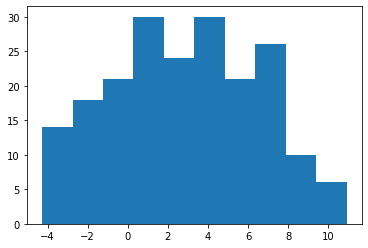

In [ ]:
import matplotlib.pyplot as plt

plt.hist(np.log10(newcol))